In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from sklearn.metrics import mean_squared_error


In [25]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

In [26]:
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [27]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [28]:
data = data['Close'].values.reshape(-1, 1)

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [30]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [31]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [32]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [33]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [34]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - loss: 2.3050e-04 - val_loss: 4.5957e-04
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 9.1078e-05 - val_loss: 4.2992e-04
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - loss: 8.6828e-05 - val_loss: 5.1307e-04
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: 7.8563e-05 - val_loss: 4.1687e-04
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 8.3241e-05 - val_loss: 4.1063e-04
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 7.4246e-05 - val_loss: 4.1213e-04
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 6.4879e-05 - val_loss: 4.1699e-04
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 7.1645e-05 - val_loss: 4.0871e-04
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 6.8821e-05 - val_loss: 3.8608e-04
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 6.688

In [15]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [16]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [17]:
train_score = mean_squared_error(y_train, train_predict)
test_score = mean_squared_error(y_test, test_predict)
print(f'Train Score: {train_score:.4f} MSE')
print(f'Test Score: {test_score:.4f} MSE')

Train Score: 1897.9805 MSE
Test Score: 14079.4402 MSE


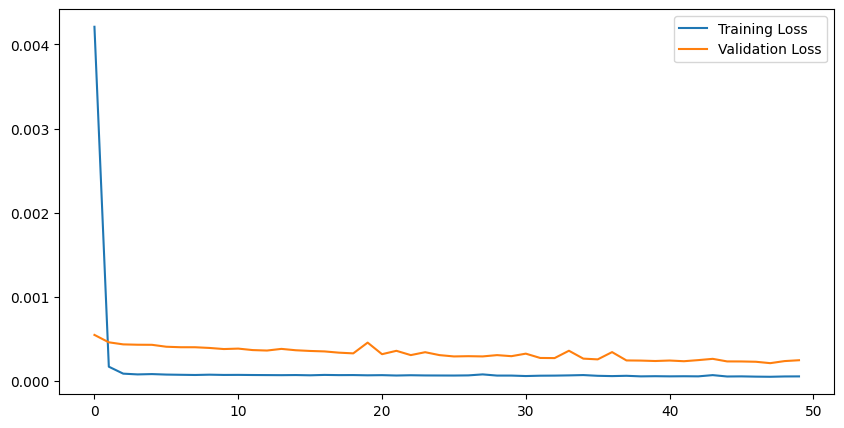

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [19]:
future_steps = 30  
last_data = scaled_data[-time_step:]
future_predictions = []

In [20]:
for _ in range(future_steps):
    x_input = last_data[-time_step:].reshape(1, time_step, 1)
    next_prediction = model.predict(x_input)
    future_predictions.append(next_prediction[0, 0])
    last_data = np.append(last_data, next_prediction, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [21]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

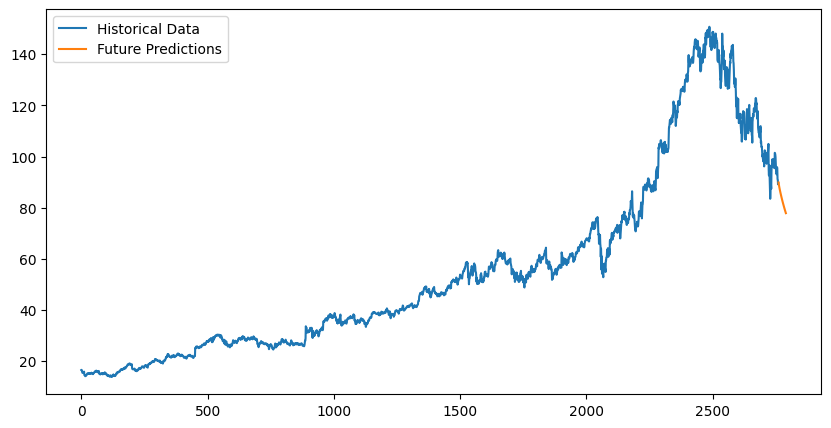

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(data)), scaler.inverse_transform(scaled_data), label='Historical Data')
plt.plot(range(len(data), len(data) + future_steps), future_predictions, label='Future Predictions')
plt.legend()
plt.show()

In [1]:
import os
os.getcwd()



'C:\\Users\\Dell'